# Comparing DurableConsumerType with Analytical Solution when Adjustment Costs are zero

[Lecture notes](https://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Consumption/Durables/) show that without adjustment costs, the optimal ratio of durables to non-durable consumtpion should be equal to:
$$
\frac{d}{c} = \Big(\frac{1 - \alpha}{\alpha}\Big)\Big(\frac{R}{(1-R)+ dDepr}\Big)
$$

This analytical solution only holds without liquidity constraints and an infinite horizon case. Let's see if it works and how agents react with constraints and a lifecycle set-up.

In [1]:
### Import
import numpy as np
from DurableModel import DurableConsumerType
from HARK.ConsumptionSaving.ConsIndShockModel import init_idiosyncratic_shocks

import matplotlib.pyplot as plt

In [2]:
init_durable = dict(
    init_idiosyncratic_shocks,
    **{
        "alpha": 0.7, # Cobb-Douglas parameter for non-durable good consumption in utility function
        "dDepr": 0.3, # Depreciation Rate of Durable Stock
        "adjC": 0, # Adjustment costs
        "d_ubar": 0, # Minimum durable stock for utility function
        # For Grids
        "nNrmMin": 0.0,
        "nNrmMax": 20, #5,
        "nNrmCount": 50,
        "mNrmMin": 0.0,
        "mNrmMax": 20,
        "mNrmCount": 100,
        "xNrmMin": 0.0,
        "xNrmMax": 40, #10,  # xMax = mNrmMax + (1 - adjC)* nNrmMax
        "xNrmCount": 100,
        "aNrmMin": 0.0,
        "aNrmMax": 50,  #xNrmMax+1.0
        "aNrmCount": 100,
        ### No income shocks
        "PermGroFac": [1.0, 1.0, 1.0, 1.0],# 1.0],
        "PermShkCount": 7,
        "PermShkStd": [0.0, 0.0, 0.0, 0.0], #, 0.0, 0.0, 0.0],
        "TranShkStd": [0.0, 0.0, 0.0, 0.0], #, 0.0, 0.0, 0.0],
        "UnempPrb": 0.0,
        "UnempPrbRet": 0.0,
        "LivPrb": [1.0, 1.0, 1.0, 1.0], #, 1.0, 1.0, 1.0],
        ### For simulation
        "T_sim": 4,
        "AgentCount": 10,
        ### Others
        "BoroCnstArt": 0,
        "BoroCnstdNrm": 0, # Borrowing Constraint of durable goods.
        "cycles": 1,
        "T_cycle": 4,
        "tol": 1e-08,
        # To construct grids differently
        "NestFac": 3, 
        "grid_type": 'nonlinear',
    }
)

## 1. The Lifecycle Case

In [3]:
Durable_NoadjC_life = DurableConsumerType(**init_durable)
Durable_NoadjC_life.update_income_process()
Durable_NoadjC_life.solve()#(verbose=False)

In [4]:
grid = np.linspace(0,20,100)
n = 0
ratio_0 = np.zeros(len(grid))
ratio_1 = np.zeros(len(grid))
ratio_2 = np.zeros(len(grid))
ratio_3 = np.zeros(len(grid))
ratio_4 = np.zeros(len(grid))

for i in range(len(grid)):
    ratio_0[i] = Durable_NoadjC_life.solution[0].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[0].cFunc(n,grid[i])
    ratio_1[i] = Durable_NoadjC_life.solution[1].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[1].cFunc(n,grid[i])
    ratio_2[i] = Durable_NoadjC_life.solution[2].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[2].cFunc(n,grid[i])
    ratio_3[i] = Durable_NoadjC_life.solution[3].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[3].cFunc(n,grid[i])
    ratio_4[i] = Durable_NoadjC_life.solution[4].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[4].cFunc(n,grid[i])

ratio_analyt = np.ones(len(grid)) * (1 - Durable_NoadjC_life.alpha)/(Durable_NoadjC_life.alpha) * Durable_NoadjC_life.Rfree/(Durable_NoadjC_life.Rfree  - 1 + Durable_NoadjC_life.dDepr)

<ipython-input-4-cdc47b10b258>:10: RuntimeWarning: invalid value encountered in true_divide
  ratio_0[i] = Durable_NoadjC_life.solution[0].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[0].cFunc(n,grid[i])
<ipython-input-4-cdc47b10b258>:11: RuntimeWarning: invalid value encountered in true_divide
  ratio_1[i] = Durable_NoadjC_life.solution[1].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[1].cFunc(n,grid[i])
<ipython-input-4-cdc47b10b258>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio_2[i] = Durable_NoadjC_life.solution[2].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[2].cFunc(n,grid[i])
<ipython-input-4-cdc47b10b258>:13: RuntimeWarning: invalid value encountered in true_divide
  ratio_3[i] = Durable_NoadjC_life.solution[3].dFunc(n,grid[i]) / Durable_NoadjC_life.solution[3].cFunc(n,grid[i])
<ipython-input-4-cdc47b10b258>:14: RuntimeWarning: invalid value encountered in true_divide
  ratio_4[i] = Durable_NoadjC_life.solution[4].dFunc(n,grid[i]) / Durable_NoadjC

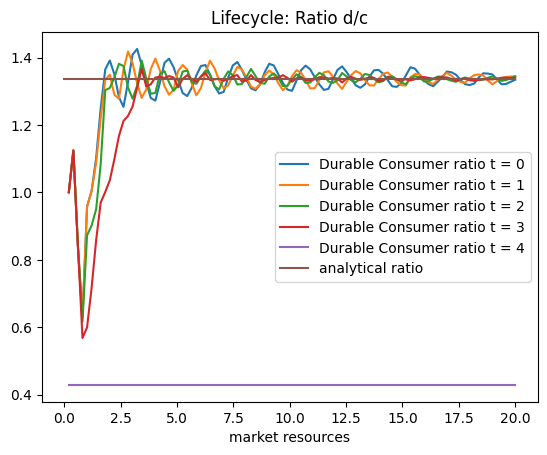

In [5]:
plt.plot(grid,ratio_0, label = "Durable Consumer ratio t = 0")
plt.plot(grid,ratio_1, label = "Durable Consumer ratio t = 1")
plt.plot(grid,ratio_2, label = "Durable Consumer ratio t = 2")
plt.plot(grid,ratio_3, label = "Durable Consumer ratio t = 3")
plt.plot(grid,ratio_4, label = "Durable Consumer ratio t = 4")
plt.plot(grid, ratio_analyt, label = "analytical ratio")
plt.title('Lifecycle: Ratio d/c')
plt.xlabel('market resources')
plt.legend()
plt.show()

### Interpretation:
For small values of market resources: Due to constraints, cannot purchase the value function optimizing amount of durables.

The closer to the terminal period the less the consumer wants to buy durable goods, as they last longer than the agent.

In the terminal period, durability does not play a role anymore and the agent purchases d/c = alpha/(1 - alpha)

## 2. Infinite Horizon

In [6]:
Durable_NoadjC_inf = DurableConsumerType(**init_durable)
Durable_NoadjC_inf.cycles = 0
Durable_NoadjC_inf.update_income_process()
Durable_NoadjC_inf.solve()#(verbose=False)

In [7]:
grid = np.linspace(0,20,100)
n = 0
ratio_0 = np.zeros(len(grid))

for i in range(len(grid)):
    ratio_0[i] = Durable_NoadjC_inf.solution[0].dFunc(n,grid[i]) / Durable_NoadjC_inf.solution[0].cFunc(n,grid[i])

ratio_analyt = np.ones(len(grid)) * (1 - Durable_NoadjC_inf.alpha)/(Durable_NoadjC_inf.alpha) * Durable_NoadjC_inf.Rfree/(Durable_NoadjC_inf.Rfree - 1 + Durable_NoadjC_inf.dDepr)

<ipython-input-7-db3d0cac4032>:6: RuntimeWarning: invalid value encountered in true_divide
  ratio_0[i] = Durable_NoadjC_inf.solution[0].dFunc(n,grid[i]) / Durable_NoadjC_inf.solution[0].cFunc(n,grid[i])


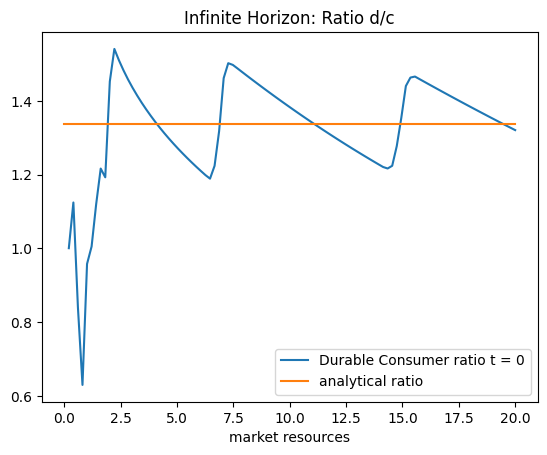

In [8]:
plt.plot(grid,ratio_0, label = "Durable Consumer ratio t = 0")
plt.plot(grid, ratio_analyt, label = "analytical ratio")
plt.title('Infinite Horizon: Ratio d/c')
plt.xlabel('market resources')
plt.legend()
plt.show()

### Interpretation:
Similar to the lifecycle case: for small values of market resources, the agent is resource constraint and cannot purchase the value function maximizing durable goods.